# Snakes and ladders


In [3]:
import random
from statistics import median, mean, stdev


def single_game(num_players):
    """
    Returns duration of single game.

    Arguments
    ---------
    num_players : int
        Number of players in the game

    Returns
    -------
    num_moves : int
        Number of moves the winning player needed to reach the goal
    """
    num_moves = 0
    players = create_players(num_players)
    while not game_ends(players):
        for player_num, position in enumerate(players):
            players[player_num] = one_move(position)
        num_moves += 1

    return num_moves


def multiple_games(num_games, num_players):
    """
    Returns durations of a number of games.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game

    Returns
    -------
    num_moves : list
        List with the numbedr of moves needed in each game.
    """
    num_moves = []
    for i in range(num_games):
        num_moves.append(single_game(num_players))
    return num_moves


def multi_game_experiment(num_games, num_players, seed):
    """
    Returns durations of a number of games when playing with given seed.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game
    seed : int
        Seed used to initialise the random number generator

    Returns
    -------
    num_moves : list
        List with the numbedr of moves needed in each game.
    """

    random.seed(seed)
    num_moves = multiple_games(num_games, num_players)
    return num_moves


def create_players(n):
    """
    Creates a list of zeroes representing the starting position of players.
    """
    if n < 1:
        raise ValueError(
            "Error: The number of players must be greater than zero.")

    return [0] * n


def dice_roll():
    """
    Returns the result of a dice roll.
    """
    return random.randint(1, 6)


def one_move(starting_position):
    """
    Plays one move in the game. Returns the position after
     the turn has finished.
     """
    roll = dice_roll()
    middle_position = starting_position + roll
    end_position = check_if_snake_or_ladder(middle_position)

    return end_position


def check_if_snake_or_ladder(position):
    """
    Checks if the player is on a ladder or snake position,
    :returns the new position of that player
    """
    snakes_or_ladder = {1: 40, 8: 10, 36: 52, 43: 62, 49: 79, 65: 82, 68: 85,
                        24: 5, 33: 3, 42: 30, 56: 37, 64: 27, 74: 12, 87: 70}
    if position in snakes_or_ladder.keys():
        return snakes_or_ladder[position]
    else:
        return position


def game_ends(players):
    """
    Terminates the game when a player wins
    :returns True if any player is past the finishing line
    """

    for player_num, position in enumerate(players):
        if position >= 90:
            return True


Here we simulate 100 games of snakes and ladders for 1 player, 2 players, 4 players and 8 players. Then we create histograms for the results.

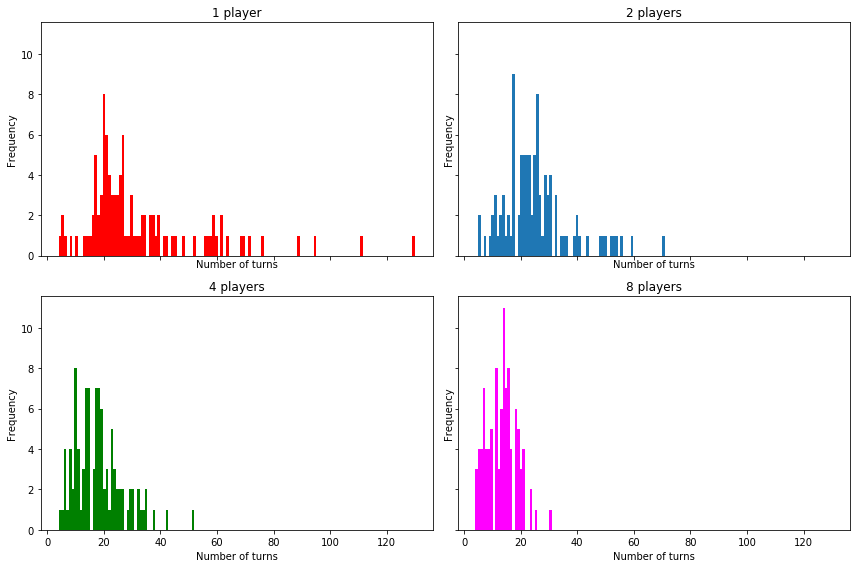

In [49]:
import matplotlib.pyplot as plt

n_bins = 100

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)

for place in [[0,0], [0,1], [1,0], [1,1]]:
    axs[place[0], place[1]].set_xlabel('Number of turns')
    axs[place[0], place[1]].set_ylabel('Frequency')

axs[0, 0].set_title('1 player')
axs[0, 1].set_title('2 players')
axs[1, 0].set_title('4 players')
axs[1, 1].set_title('8 players')

axs[0, 0].hist(multi_game_experiment(100, 1, 21), bins = max(multi_game_experiment(100, 1, 21)), color='red')
axs[0, 1].hist(multi_game_experiment(100, 2, 21), bins = max(multi_game_experiment(100, 2, 21)))
axs[1, 0].hist(multi_game_experiment(100, 4, 21), bins = max(multi_game_experiment(100, 4, 21)), color='green')
axs[1, 1].hist(multi_game_experiment(100, 8, 21), bins = max(multi_game_experiment(100, 8, 21)), color='magenta')
fig.tight_layout()
plt.show()